<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg">
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina), Sergey Isaev, and [Artem Trunov](https://www.linkedin.com/in/datamove/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Topic 1. Exploratory data analysis with Pandas

<img align="center" src="https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg"  width=50% />

## Article outline
1. [Demonstration of main Pandas methods](#1.-Demonstration-of-main-Pandas-methods)
2. [First attempt at predicting telecom churn](#2.-First-attempt-at-predicting-telecom-churn)
3. [Assignments](#3.-Assignments)
4. [Useful resources](#4.-Useful-resources)

## 1. Demonstration of main Pandas methods
Well... There are dozens of cool tutorials on Pandas and visual data analysis. If you are already familiar with these topics, you can wait for the 3rd article in the series, where we get into machine learning.  

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.precision", 2)

We'll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [2]:
df = pd.read_csv(r"C:\Users\Snehal Thakur\Desktop\PythonClass\Pandas\Datasets\telecom_churn.csv")
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` is less nicely formatted.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [3]:
print(df.shape)

(3333, 20)


From the output, we can see that the table contains 3333 rows and 20 columns.

Now let's try printing out column names using `columns`:

In [4]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe: 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [6]:
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.00,3333.00,3333,3333,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.06,437.18,NaN,NaN,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,NaN
std,NaN,39.82,42.37,NaN,NaN,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,NaN
min,NaN,1.00,408.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,NaN
25%,NaN,74.00,408.00,NaN,NaN,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,NaN
50%,NaN,101.00,415.00,NaN,NaN,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,NaN
75%,NaN,127.00,510.00,NaN,NaN,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,NaN


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [7]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let's apply this method to the `Churn` feature to convert it into `int64`:

In [8]:
df["Churn"] = df["Churn"].astype("int64")

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of `Churn`:

In [9]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

<BarContainer object of 2 artists>

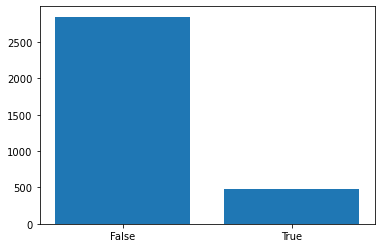

In [10]:
plt.bar(["False","True"],df["Churn"].value_counts())

2850 users out of 3333 are *loyal*; their `Churn` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [11]:
df["Churn"].value_counts(normalize=True)

0    0.86
1    0.14
Name: Churn, dtype: float64


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [12]:
df.sort_values(by="Total day charge", ascending=False).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1
975,DE,129,510,No,No,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
1679,OK,82,510,No,No,0,329.8,73,56.07,208.3,120,17.71,267.1,102,12.02,10.6,6,2.86,0,1
2028,SD,93,510,No,No,0,328.1,106,55.78,151.7,89,12.89,303.5,114,13.66,8.7,3,2.35,1,1
197,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1


We can also sort by multiple columns:

In [13]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0
1165,VT,50,415,Yes,Yes,26,307.1,94,52.21,289.4,78,24.60,174.9,109,7.87,8.0,3,2.16,0,0
3207,DC,93,408,No,Yes,22,306.2,123,52.05,189.7,83,16.12,240.3,107,10.81,11.7,2,3.16,0,0
2478,TN,123,415,No,Yes,34,305.2,80,51.88,156.5,109,13.30,280.0,81,12.60,13.2,7,3.56,1,0
1355,TX,50,408,No,Yes,31,302.7,93,51.46,240.5,119,20.44,193.9,103,8.73,13.6,14,3.67,3,0
1830,CT,50,408,No,No,0,301.7,82,51.29,167.1,118,14.20,72.2,89,3.25,10.5,6,2.84,1,0


### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**

In [14]:
df.Churn.count()

3333

In [15]:
df["Churn"].mean()

0.14491449144914492

14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**What are average values of numerical features for churned users?**

In [16]:
df["Churn"]==1

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

In [17]:
df[df["Churn"]==1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


In [18]:
df[df["Churn"] == 1].mean()

C:\Users\SNEHAL~1\AppData\Local\Temp/ipykernel_25392/507517496.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["Churn"] == 1].mean()


Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [19]:
df["Churn"] == 1

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

In [20]:
df[df["Churn"] == 1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


In [21]:
df[df["Churn"] == 1]["Total day minutes"]

10      129.1
15      332.9
21       62.4
33      249.6
41      173.1
        ...  
3301    280.0
3304    186.1
3320    140.0
3322    321.1
3323    118.4
Name: Total day minutes, Length: 483, dtype: float64

In [22]:
df[df["Churn"] == 1]["Total day minutes"].mean()      # Average of Total day minutes where churn = 1

206.91407867494814


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [23]:
df["Churn"] == 0

0       True
1       True
2       True
3       True
4       True
        ... 
3328    True
3329    True
3330    True
3331    True
3332    True
Name: Churn, Length: 3333, dtype: bool

In [24]:
df[df["Churn"] == 0]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [25]:
df[df["Churn"] == 0]["Total intl minutes"].max()      # maximum international call minutes

18.9

In [26]:
df["International plan"].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [27]:
df["International plan"]=="No"

0        True
1        True
2        True
3       False
4       False
        ...  
3328     True
3329     True
3330     True
3331    False
3332     True
Name: International plan, Length: 3333, dtype: bool

In [28]:
df[df["International plan"]=="No"]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [29]:
(df["International plan"]=="No") & (df["Churn"] == 0)

0        True
1        True
2        True
3       False
4       False
        ...  
3328     True
3329     True
3330     True
3331    False
3332     True
Length: 3333, dtype: bool

In [30]:
df[(df["International plan"]=="No") & (df["Churn"] == 0)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [31]:
df[(df["International plan"]=="No") & (df["Churn"] == 0)]["Total intl minutes"]

0       10.0
1       13.7
2       12.2
6        7.5
8        8.7
        ... 
3327    11.8
3328     9.9
3329     9.6
3330    14.1
3332    13.7
Name: Total intl minutes, Length: 2664, dtype: float64

In [32]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

In [33]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [34]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [35]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [36]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with W, we can do it like this:

In [37]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [38]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The same thing can be done with the `replace` method:

In [39]:
df = df.replace({"Voice mail plan": d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [40]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [41]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [42]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [43]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

In [44]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60



### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let's create the `total_calls` Series and paste it into the DataFrame:



In [45]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


It is possible to add a column more easily without creating an intermediate Series instance:

In [46]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [47]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We'll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn` (however, visual analysis will be covered more thoroughly in the next article).


In [48]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [49]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

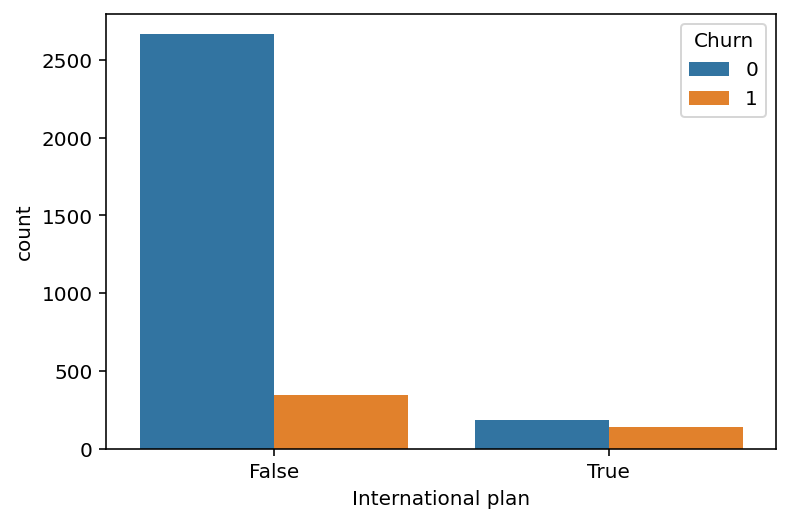

In [50]:
sns.countplot(x="International plan", hue="Churn", data=df);


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – *Customer service calls*. Let's also make a summary table and a picture.

In [51]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


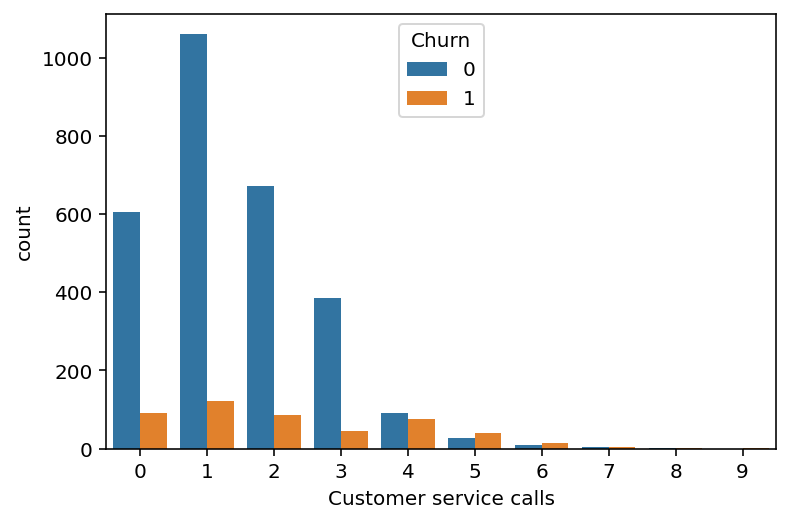

In [52]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn. 

In [53]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


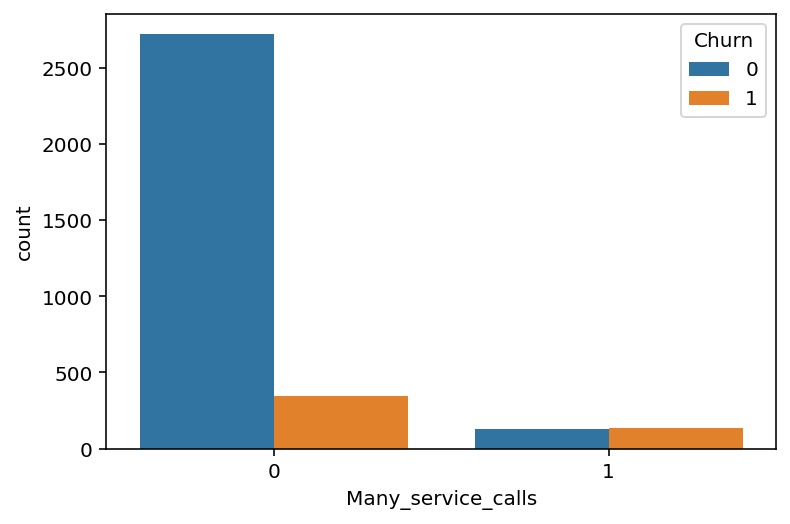

In [54]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);


Let's construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [55]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Therefore, predicting that a customer is not loyal (*Churn*=1) in the case when the number of calls to the service center is greater than 3 and the *International Plan* is added (and predicting *Churn*=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (*baseline*) for the further machine learning models that we will build. 

As we move on in this course, recall that, before the advent of machine learning, the data analysis process looked something like this. Let's recap what we've covered:
    
- The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (*accuracy*) of subsequent models should be no less than this number, and will hopefully be significantly higher;
- With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we'll talk about decision trees and figure out how to find such rules **automatically** based only on the input data;
- We got these two baselines without applying machine learning, and they'll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase the share of correct answers by 0.5% per se, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple model with two conditions;
- Before training complex models, it is recommended to manipulate the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.

## 3. Assignments
### Demo-version
To practice with Pandas and EDA, you can complete [this demo assignment](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset) where you'll be analyzing socio-demographic data. The assignment is just for you to practice, and goes with [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution).

### Bonus version
You can also choose a ["Bonus Assignments" tier](https://www.patreon.com/ods_mlcourse) (details are outlined on the [mlcourse.ai](https://mlcourse.ai/) main page) and get a non-demo version of the assignment where the history of Olympic Games is analyzed with Pandas. 

## 4. Useful resources

* The same notebook as an interactive web-based [Kaggle Notebook](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
* ["Merging DataFrames with pandas"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) – a tutorial by Max Plako within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
* ["Handle different dataset with dask and trying a little dask ML"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/dask_objects_and_little_dask_ml_tutorial_iknyazeva.ipynb) – a tutorial by Irina Knyazeva within mlcourse.ai
* Main course [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
* Official Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
* Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68) based on this notebook
* If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/322626/) on Habr.com with ~ the same material. And a [lecture](https://youtu.be/dEFxoyJhm3Y) on YouTube
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn